In [215]:
import pandas
import numpy as np
from pprint import pprint
from matplotlib import pyplot as plt

In [142]:
df = pandas.read_csv("metric.csv")

In [143]:
odgpf = df[df['algorithm'] == "ODG-PF"]
odgpfgnu =  df[df['algorithm'] == "ODG-PF-GNU"]
odgpfpp =  df[df['algorithm'] == "ODG-PF-PP"]

In [144]:
fgmstech = df[df['algorithm'] == "GRP"]
fgmgnu = df[df['algorithm'] == "FGM-GNU"]
fgmpp = df[df['algorithm'] == "FGM-PP"]

In [145]:
def plotting_by_maps(data):
    bar_size = 2
    x_range = np.arange(len(data['map']))
#     x_range_plot = np.linspace(-0.3, 0.3, bar_size)
    x_range_plot = [-0.15, 0.15]
#     x_range_div = x_range_plot[-1] - x_range_plot[-2]
    x_range_div = 0.3
    plt.bar(x_range + x_range_plot[0], data['comfort'], width=x_range_div)
#     plt.bar(x_range + x_range_plot[1], data['avg_speed'], width=x_range_div)
    plt.bar(x_range + x_range_plot[1], data['st'], width=x_range_div)
    # plt.bar(x_range + x_range_plot[3], data['lap_time_1'], width=x_range_div)
    plt.legend(['Comfort', 'Safety'])
    plt.xticks(x_range, list(data['map']))
    plt.grid(axis='y')
    plt.xlabel("Maps")
    plt.ylabel("Scores")
    plt.title(list(data['algorithm'])[0])
    print()
    plt.rcParams['figure.figsize'] = [6, 6]
    plt.rcParams['figure.dpi'] = 150 # 200 e.g. is really fine, but slower
    plt.show()

['Racing', 'Sprint', 'Obstacle 1', 'Obstacle 2', 'Curve', 'Easy Racing']


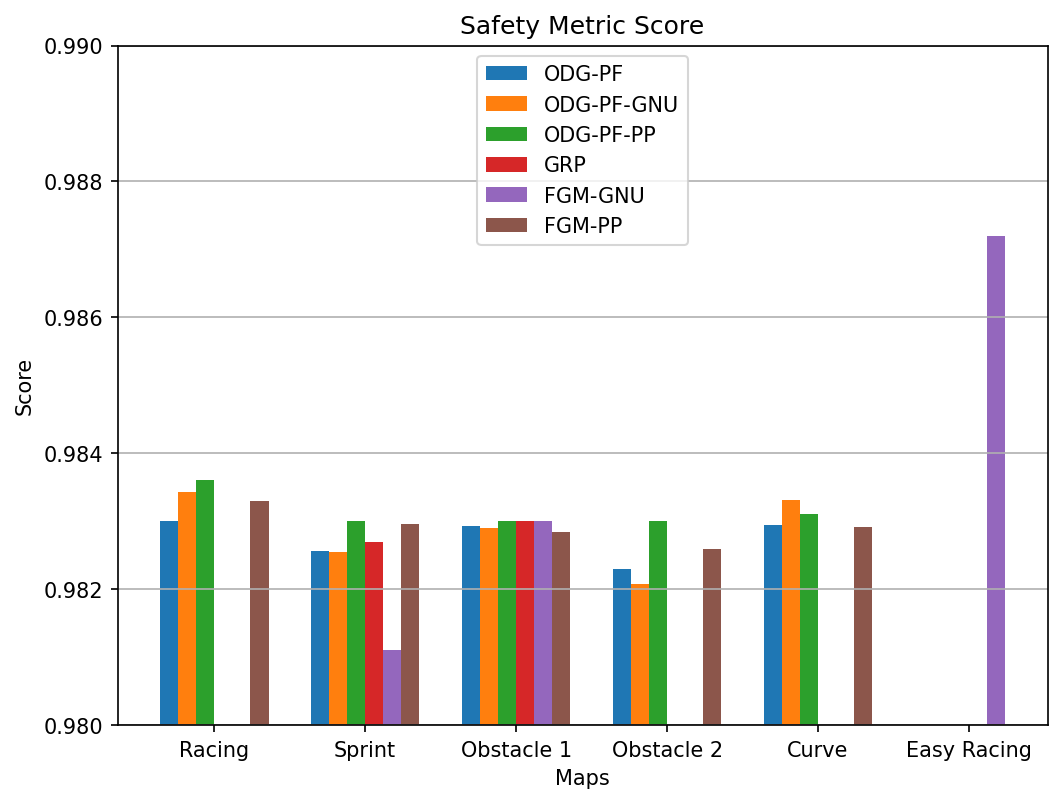

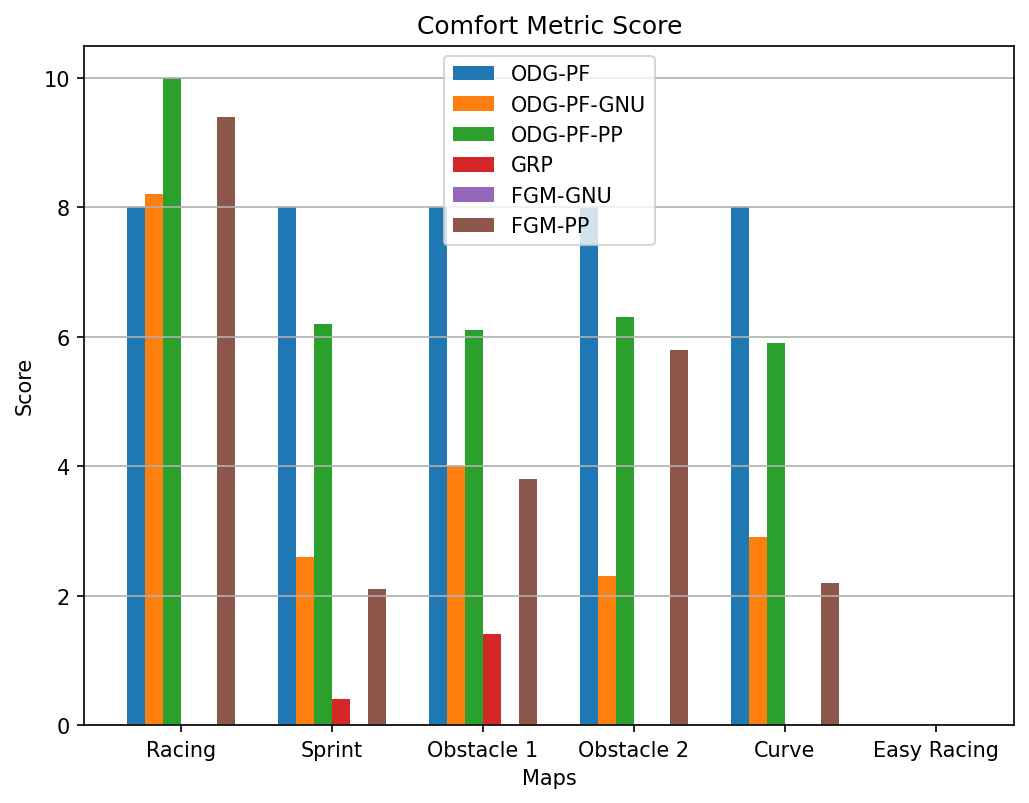

[[8.0, 8.0, 8.0, 8.0, 8.0, nan],
 [8.2, 2.6, 4.0, 2.3, 2.9, nan],
 [10.0, 6.2, 6.1, 6.3, 5.9, nan],
 [nan, 0.4, 1.4, 0.0, 0.0, 0.0],
 [nan, 0.0, 0.0, 0.0, 0.0, 0.0],
 [9.4, 2.1, 3.8, 5.8, 2.2, nan]]


In [243]:
maps = []
algo = []
for i in (list(df['map'])):
#     print(i)
    if i in maps:
        pass
    else:
        maps.append(i)

print(maps)

for i in (list(df['algorithm'])):
    if i in algo:
        pass
    else:
        algo.append(i)
        
# print(algo)

# print(df[df['algorithm'] == algo[0]]['map'])


x_range = np.arange(len(maps))
x_range_plot = np.linspace(-0.3, 0.3, len(algo))
x_range_div = x_range_plot[-1] - x_range_plot[-2]
    
# print(x_range)

st_data = []
comfort_data = []
for i in algo:
    data = df[df['algorithm'] == i]
    st_read = []
    comfort_read = []
    for j in maps:
        if j in list(data['map']):
            st_read.append(list(data[data['map'] == j]['st'])[0])
            comfort_read.append(list(data[data['map'] == j]['comfort'])[0])
        else:
            st_read.append(np.NAN)
            comfort_read.append(np.NAN)
    st_data.append(st_read)
    comfort_data.append(comfort_read)

for i, st in enumerate(st_data):
    plt.bar(x_range + x_range_plot[i], st, width=x_range_div)
plt.xticks(x_range, maps)
plt.xlabel("Maps")
plt.ylabel("Score")
plt.ylim(0.98,0.99)
plt.grid(axis='y')
plt.title("Safety Metric Score")
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 150 # 200 e.g. is really fine, but slower
plt.legend(algo)
plt.show()

for i, comfort in enumerate(comfort_data):
    plt.bar(x_range + x_range_plot[i], comfort, width=x_range_div)
plt.xticks(x_range, maps)
plt.xlabel("Maps")
plt.ylabel("Score")
# plt.ylim(0.98,0.99)
plt.grid(axis='y')
plt.title("Comfort Metric Score")
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 150 # 200 e.g. is really fine, but slower
plt.legend(algo)
plt.show()

pprint(comfort_data)

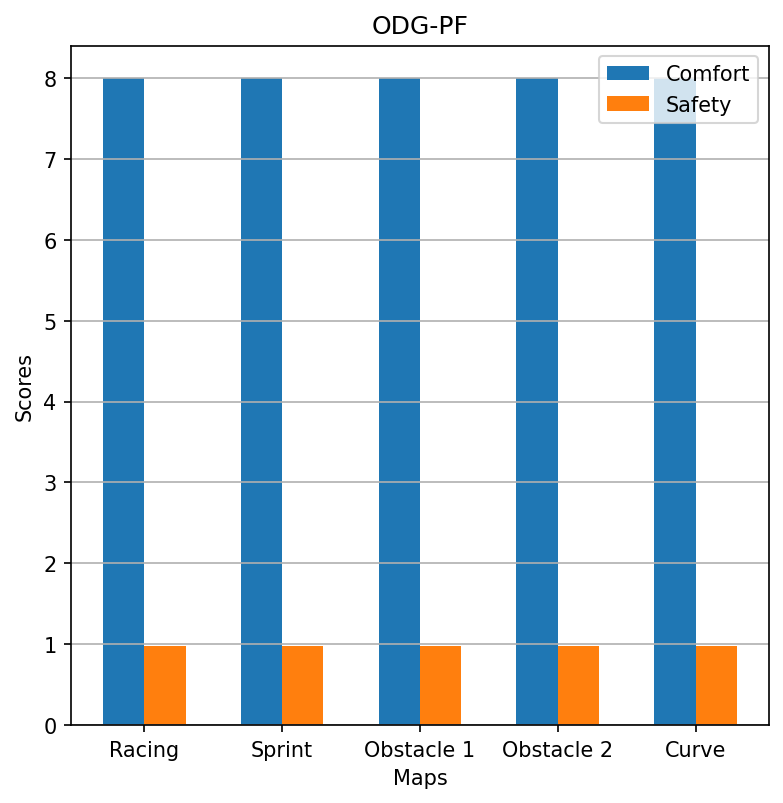

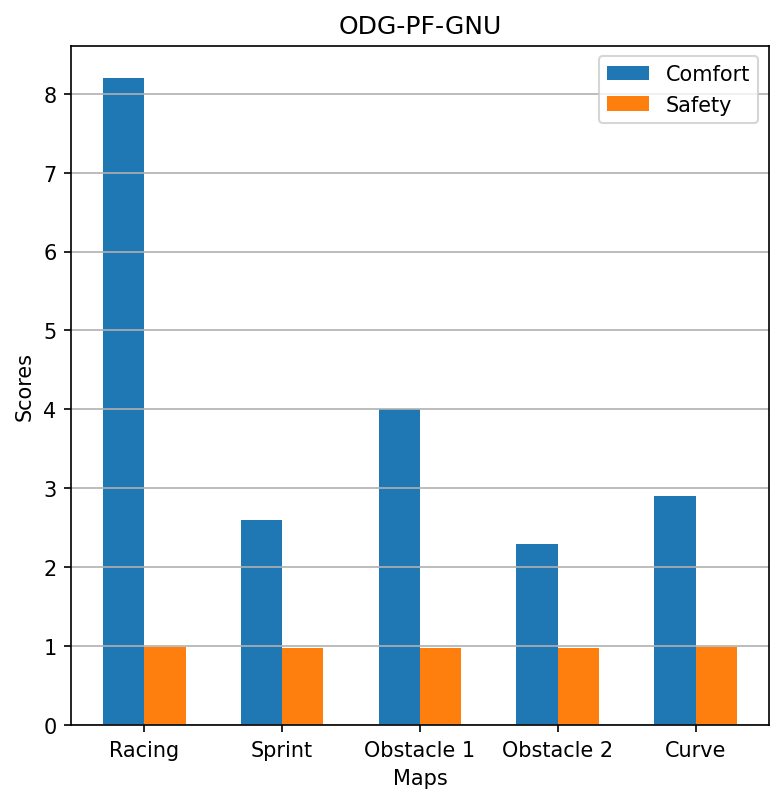

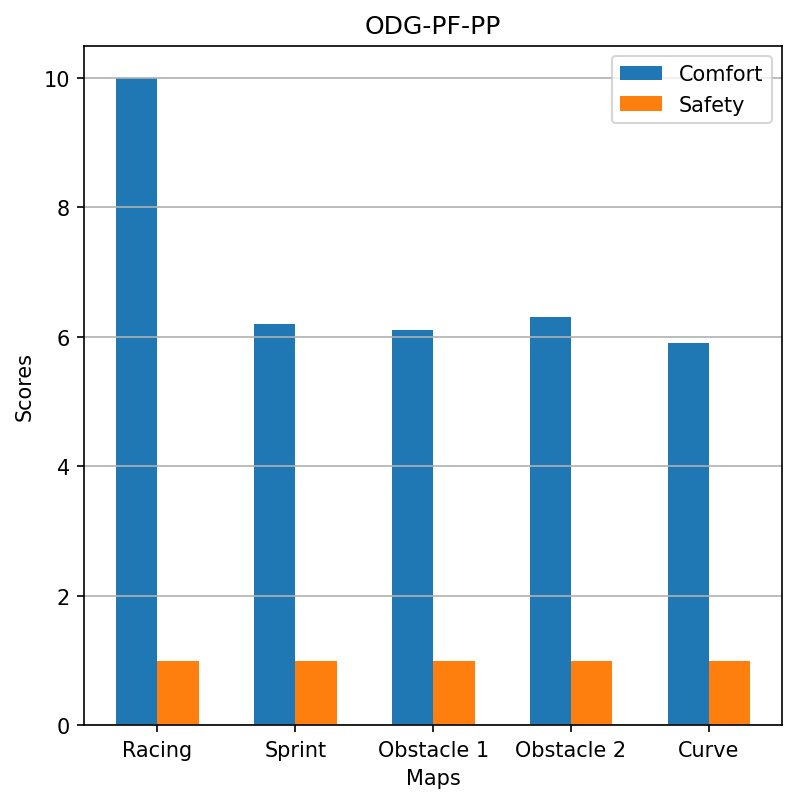

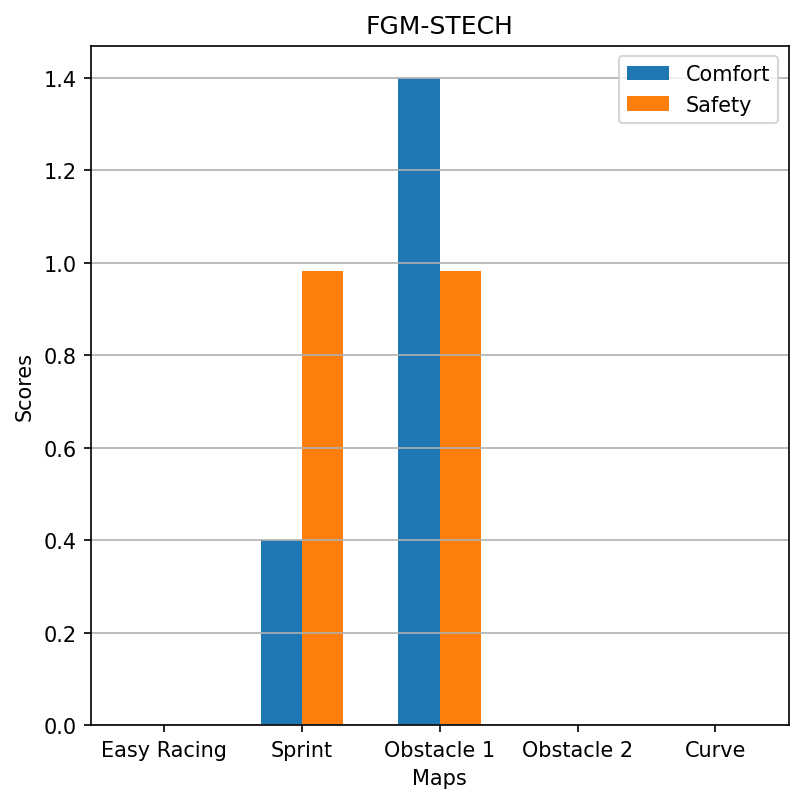

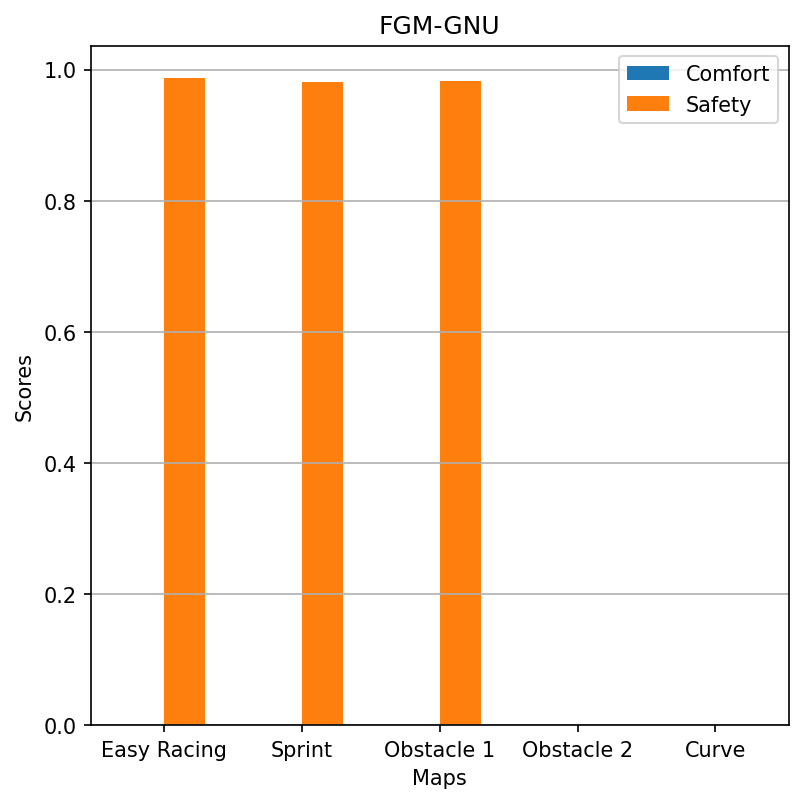

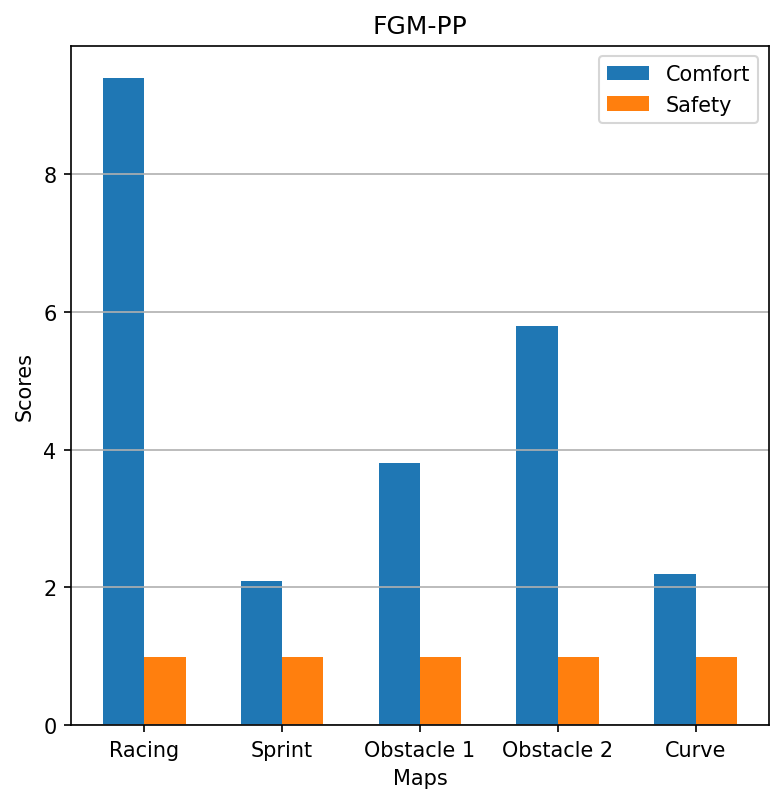

In [133]:
for i in [odgpf, odgpfgnu, odgpfpp, fgmstech, fgmgnu, fgmpp]:
    plotting_by_maps(i)

In [256]:
def honeycomb_list(inp):
    inp2 = []
    for i in inp:
        if i == np.NAN:
            inp2.append(0)
        else:
            inp2.append(i)
    inp = inp2
            
    result_x = []
    result_y = []
    for i in range(6):
        theta = (2 * np.pi / 6) * (i + 1) - (2 * np.pi / 6) / 2
        result_x.append(inp[i] * np.cos(theta))
        result_y.append(inp[i] * np.sin(theta))
    theta = (2 * np.pi / 6) * (0 + 1) - (2 * np.pi / 6) / 2
    result_x.append(inp[0] * np.cos(theta))
    result_y.append(inp[0] * np.sin(theta))    
    return result_x, result_y

def honeycomb_graph(inp1, inp2, column):
    max_list = np.zeros(6) + inp1
    max_x, max_y = honeycomb_list(max_list)
    x, y = honeycomb_list(inp2)
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 15)
    fig.patch.set_visible(False)
    ax.axis('off')
    # 바깥쪽 그래프
    plt.plot(max_x, max_y, 'b')
    # 안쪽 그래프
    plt.plot(x, y, 'r')
    # 색 채우기
    plt.fill_between(x, y, 0, facecolor="red", alpha=0.2)
    # 점수쓰기
    score_list = np.array(inp2) + 1
    score_x, score_y = honeycomb_list(score_list)
    # 글자쓰기
    text = column
    text_x, text_y = honeycomb_list(max_list + 1)
    for i in range(6):
        # 점수
        plt.text(score_x[i], score_y[i], inp2[i], fontsize = 18)
        # 점선
        plt.plot([0, max_x[i]], [0, max_y[i]], linestyle = '--', color = 'gray')
        # 글자
        plt.text(text_x[i], text_y[i], text[i], fontsize = 24)

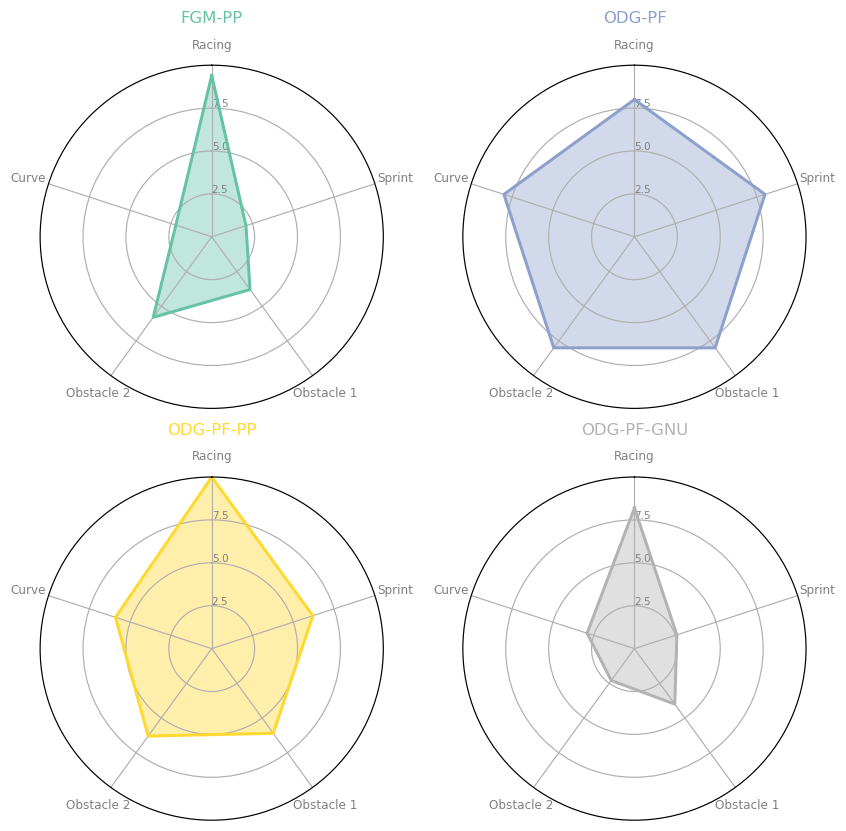

In [311]:
from math import pi

df = pandas.read_csv("metric.csv")
##### only racing ###########
maps = ['Racing', 'Sprint', 'Obstacle 1', 'Obstacle 2', 'Curve']
fgmpp = df[df['algorithm'] == 'FGM-PP']
odgpf = df[df['algorithm'] == 'ODG-PF']
odgpp = df[df['algorithm'] == 'ODG-PF-PP']
odgpfgnu = df[df['algorithm'] == 'ODG-PF-GNU']

buf1 = []
for i in maps:
    buf2 = []
    for j in [fgmpp, odgpf, odgpp, odgpfgnu]:
#         print(list(j[j['map'] == i]['st'])[0])
        buf2.append(list(j[j['map'] == i]['comfort'])[0])
    buf1.append(buf2)
        
# Set data
df1 = pandas.DataFrame({
'group': ['FGM-PP','ODG-PF','ODG-PF-PP','ODG-PF-GNU'],
maps[0]: buf1[0],
maps[1]: buf1[1],
maps[2]: buf1[2],
maps[3]: buf1[3],
maps[4]: buf1[4]
})
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
    # number of variable
    categories=list(df1)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([2.5,5.0,7.5], ["2.5","5.0","7.5"], color="grey", size=7)
    plt.ylim(0,10)

    # Ind1
    values=df1.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=108
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df1.index))
 
# Loop to plot
for row in range(0, len(df1.index)):
    make_spider( row=row, title=df1['group'][row], color=my_palette(row))

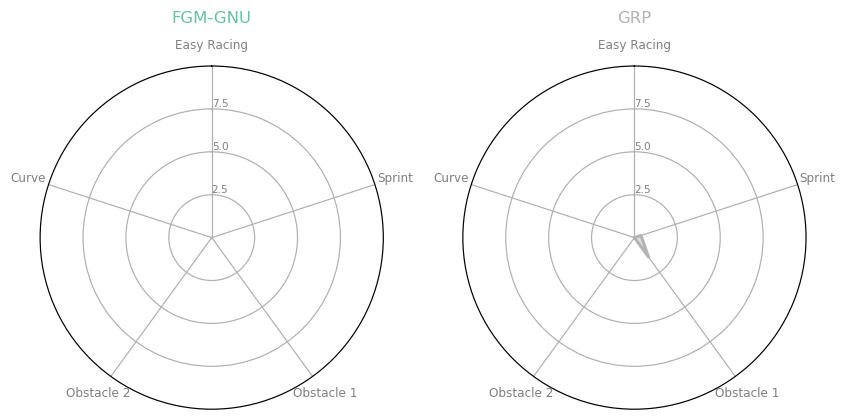

In [312]:
fgmgnu = df[df['algorithm'] == 'FGM-GNU']
grp = df[df['algorithm'] == 'GRP']

maps = ['Easy Racing', 'Sprint', 'Obstacle 1', 'Obstacle 2', 'Curve']

buf1 = []
for i in maps:
    buf2 = []
    for j in [fgmgnu, grp]:
#         print(list(j[j['map'] == i]['st'])[0])
        buf2.append(list(j[j['map'] == i]['comfort'])[0])
    buf1.append(buf2)
        

df1 = pandas.DataFrame({
'group': ['FGM-GNU', 'GRP'],
maps[0]: buf1[0],
maps[1]: buf1[1],
maps[2]: buf1[2],
maps[3]: buf1[3],
maps[4]: buf1[4]
})
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
    # number of variable
    categories=list(df1)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([2.5,5.0,7.5], ["2.5","5.0","7.5"], color="grey", size=7)
    plt.ylim(0,10)

    # Ind1
    values=df1.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=108
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df1.index))
 
# Loop to plot
for row in range(0, len(df1.index)):
    make_spider( row=row, title=df1['group'][row], color=my_palette(row))

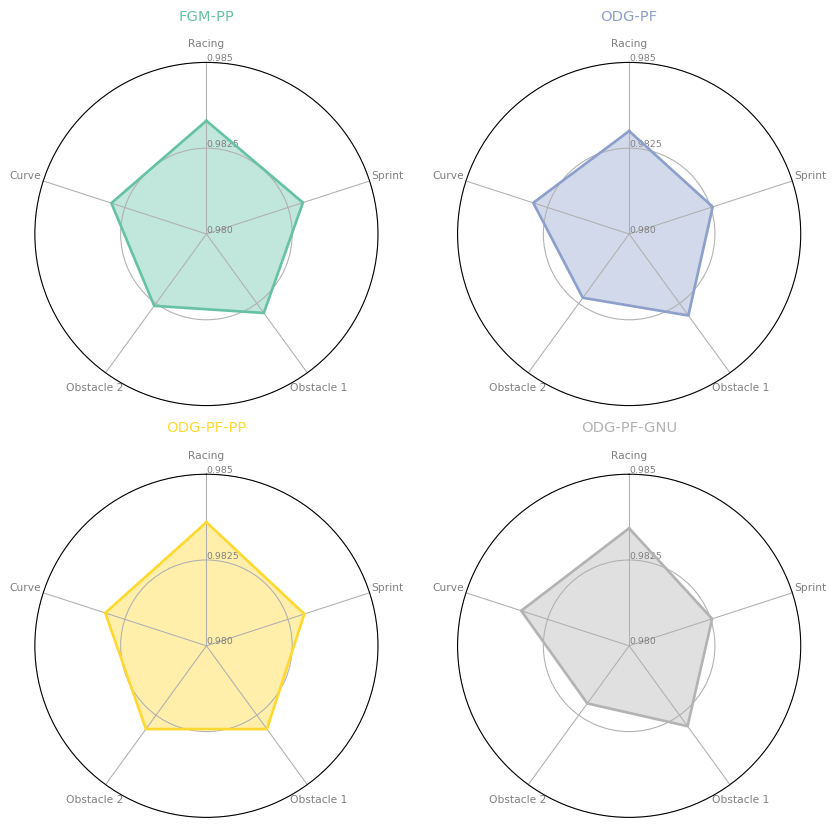

In [307]:
maps = ['Racing', 'Sprint', 'Obstacle 1', 'Obstacle 2', 'Curve']
fgmpp = df[df['algorithm'] == 'FGM-PP']
odgpf = df[df['algorithm'] == 'ODG-PF']
odgpp = df[df['algorithm'] == 'ODG-PF-PP']
odgpfgnu = df[df['algorithm'] == 'ODG-PF-GNU']

buf1 = []
for i in maps:
    buf2 = []
    for j in [fgmpp, odgpf, odgpp, odgpfgnu]:
#         print(list(j[j['map'] == i]['st'])[0])
        buf2.append(list(j[j['map'] == i]['st'])[0])
    buf1.append(buf2)
        
# Set data
df1 = pandas.DataFrame({
'group': ['FGM-PP','ODG-PF','ODG-PF-PP','ODG-PF-GNU'],
maps[0]: buf1[0],
maps[1]: buf1[1],
maps[2]: buf1[2],
maps[3]: buf1[3],
maps[4]: buf1[4]
})
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
    # number of variable
    categories=list(df1)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.98,0.9825,0.985], ["0.980","0.9825","0.985"], color="grey", size=7)
    plt.ylim(0.98,0.985)

    # Ind1
    values=df1.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df1.index))
 
# Loop to plot
for row in range(0, len(df1.index)):
    make_spider( row=row, title=df1['group'][row], color=my_palette(row))